In [22]:
#--------------------------------------

# ABIDAR Bouchra && LIEPCHITZ Laura
# MLDS 2019/2020

#--------------------------------------

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
from keras import backend as K
from keras.datasets import mnist
from keras.layers import Input, Dense, Reshape, Flatten, Dropout, Lambda
from keras.layers import BatchNormalization, Activation
from keras.layers.advanced_activations import LeakyReLU
from keras.layers.convolutional import Conv2D, Conv2DTranspose
from keras.models import Sequential, Model
from keras.optimizers import Adam
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np

Using TensorFlow backend.


In [3]:
from package_sgan import *

In [7]:
sgan = SGAN(10000,64)

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 12544)             1266944   
_________________________________________________________________
reshape_3 (Reshape)          (None, 7, 7, 256)         0         
_________________________________________________________________
conv2d_transpose_7 (Conv2DTr (None, 14, 14, 128)       295040    
_________________________________________________________________
batch_normalization_7 (Batch (None, 14, 14, 128)       512       
_________________________________________________________________
leaky_re_lu_8 (LeakyReLU)    (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_transpose_8 (Conv2DTr (None, 14, 14, 64)        73792     
_________________________________________________________________
batch_normalization_8 (Batch (None, 14, 14, 64)       

In [8]:
# Train the SGAN 
discriminator_supervised,iteration_checkpoints, d_losses,d_accuracies = sgan.train()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 12544)             1266944   
_________________________________________________________________
reshape_4 (Reshape)          (None, 7, 7, 256)         0         
_________________________________________________________________
conv2d_transpose_10 (Conv2DT (None, 14, 14, 128)       295040    
_________________________________________________________________
batch_normalization_11 (Batc (None, 14, 14, 128)       512       
_________________________________________________________________
leaky_re_lu_13 (LeakyReLU)   (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_transpose_11 (Conv2DT (None, 14, 14, 64)        73792     
_________________________________________________________________
batch_normalization_12 (Batc (None, 14, 14, 64)      

### Plot Discriminator supervised loss 

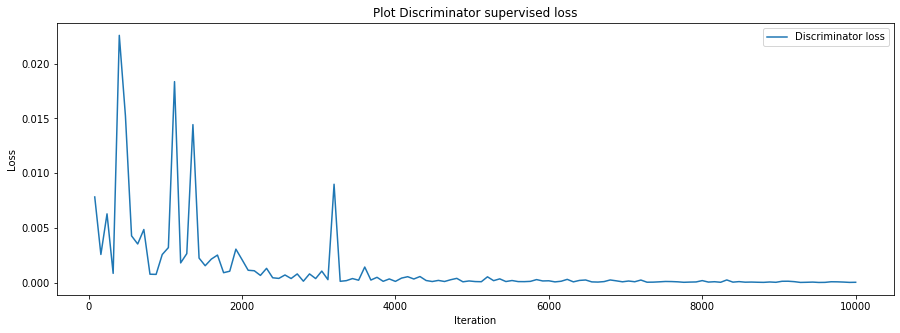

In [23]:
losses = np.array(d_losses)
plt.figure(figsize=(15, 5))
plt.plot(iteration_checkpoints, losses, label="Discriminator loss")
plt.title("Plot Discriminator supervised loss")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.legend()

In [24]:
dataset = Dataset()
x, y = dataset.test_set()
y = to_categorical(y, num_classes=10)

_, accuracy = discriminator_supervised.evaluate(x, y)
print("Test Accuracy: %.2f%%" % (100 * accuracy))

10000/10000 [==============================] - 1s 67us/step
Test Accuracy: 88.77%
